### from https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

In [2]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.24.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: threadpoolctl, scipy, joblib, numpy
Required-by: vecstack, lightgbm, imbalanced-learn


In [3]:
import sklearn

sklearn.__version__

'0.24.1'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.inspection import permutation_importance 
# if you want to use this func., upgrade the scikit-learn to 0.23.1 (https://j.mp/334YxRi)

In [33]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [11]:
# import pandas as pd

# pd.DataFrame(diabetes['target'])

print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

params = {'n_estimators': 2000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [35]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3467.4409


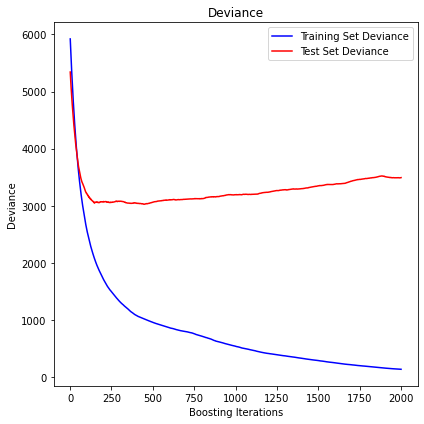

In [20]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [22]:
reg.feature_importances_

array([0.06238821, 0.01321827, 0.29956669, 0.07505409, 0.0356741 ,
       0.0729104 , 0.04581124, 0.02775809, 0.29235951, 0.07525941])

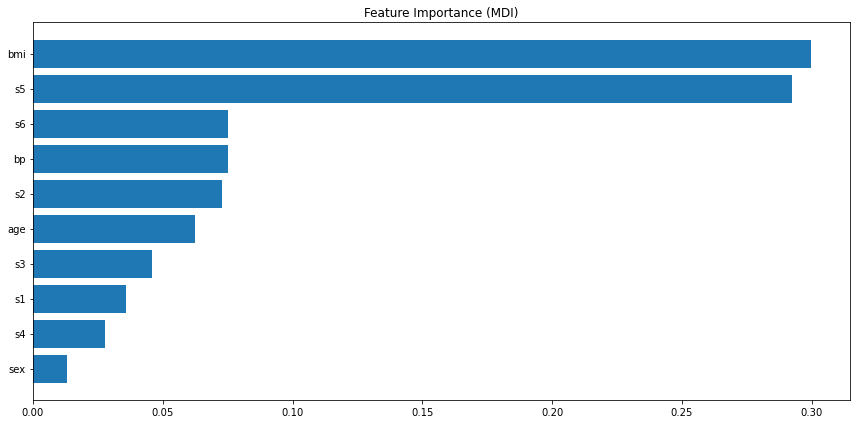

In [21]:
feature_importance = reg.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

# result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
# sorted_idx = result.importances_mean.argsort()
# plt.subplot(1, 2, 2)
# plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
# plt.title("Permutation Importance (test set)")

fig.tight_layout()
plt.show()

In [42]:
reg.score(X_test, y_test)

- Regression     -> model.score(x, y) == R2 score (1에 가까울수록 모델의 설명력이 좋음 vs 0에 가까울수록 모델의 설명력이 떨어짐)
- Classification -> model.score(x, y) == Accuracy score (1에 가까울수록 모델이 분류를 정확하게 해냄)

0.3341098589861513

In [36]:
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
result

{'importances_mean': array([-0.00186725,  0.00323713,  0.29035889,  0.08645032, -0.03072896,
        -0.01233949, -0.01170004,  0.0060382 ,  0.40154548,  0.02986607]),
 'importances_std': array([0.0380879 , 0.01768509, 0.06926484, 0.0680282 , 0.0217053 ,
        0.03442189, 0.02697923, 0.01895631, 0.11443057, 0.02242984]),
 'importances': array([[-6.64638697e-03, -6.04166881e-02,  6.00023422e-03,
          3.24784411e-02, -4.74869557e-02, -3.17899883e-02,
          1.85569936e-02,  6.68724947e-02,  3.07550106e-02,
         -2.69956994e-02],
        [-1.09104895e-02,  3.69836676e-02,  1.37328131e-02,
         -1.05131072e-02, -6.56466376e-03,  6.45092837e-04,
          1.16983816e-02,  2.75781764e-02, -1.99948505e-02,
         -1.02837035e-02],
        [ 3.01543548e-01,  2.66862469e-01,  4.30726973e-01,
          1.94574043e-01,  3.56723450e-01,  3.04580704e-01,
          2.69099870e-01,  2.42828840e-01,  1.97147038e-01,
          3.39502006e-01],
        [-1.85703424e-02,  1.92009871e-

In [37]:
pd.DataFrame(result['importances'])

,0,1,2,3,4,5,6,7,8,9
0,-0.006646,-0.060417,0.006000,0.032478,-0.047487,-0.031790,0.018557,0.066872,0.030755,-0.026996
1,-0.010910,0.036984,0.013733,-0.010513,-0.006565,0.000645,0.011698,0.027578,-0.019995,-0.010284
2,0.301544,0.266862,0.430727,0.194574,0.356723,0.304581,0.269100,0.242829,0.197147,0.339502
3,-0.018570,0.192010,0.151888,0.164357,0.035771,0.108760,-0.008960,0.057291,0.072349,0.109608
4,-0.072030,-0.044377,-0.024622,-0.052958,-0.035860,0.000750,-0.013427,-0.030545,0.000213,-0.034433
5,0.037984,-0.031573,-0.016272,0.021940,0.012505,0.006157,-0.092411,-0.012613,-0.017989,-0.031125
6,-0.013591,-0.027006,-0.042331,-0.062736,0.027939,0.022205,0.000153,-0.026485,0.005511,-0.000661
7,-0.009601,0.000606,0.038528,0.021837,-0.006788,-0.001016,0.013727,0.015099,0.020154,-0.032164
8,0.210310,0.365983,0.374417,0.447405,0.519441,0.432295,0.269439,0.293875,0.522697,0.579594
9,0.039885,-0.005379,0.085383,0.039432,0.026242,0.033195,0.021110,0.018765,0.013065,0.026964


In [41]:
result['importances'].mean(axis=1)

array([-0.00186725,  0.00323713,  0.29035889,  0.08645032, -0.03072896,
       -0.01233949, -0.01170004,  0.0060382 ,  0.40154548,  0.02986607])

In [39]:
result['importances_mean']

array([-0.00186725,  0.00323713,  0.29035889,  0.08645032, -0.03072896,
       -0.01233949, -0.01170004,  0.0060382 ,  0.40154548,  0.02986607])

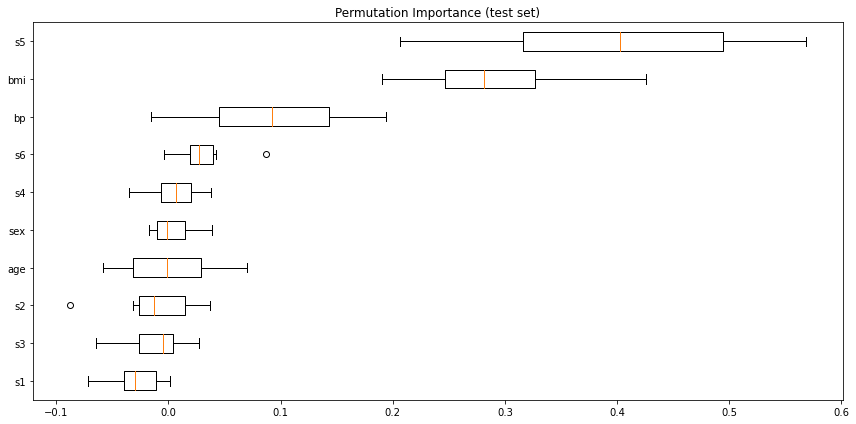

In [23]:
fig = plt.figure(figsize=(12, 6))

result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")

fig.tight_layout()
plt.show()